# Machine Learning analysis

In [34]:
import pandas as pd
df = pd.read_csv('GoMore_Data_DK_270818.csv', sep=',', low_memory=False)

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,...,time_minute,time_minute_hour,time_cat,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,False,True,True,...,30,15.50,Afternoon,0,0,0,0,1,0,0
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,False,True,True,...,0,14.00,Noon,0,0,0,1,0,0,0
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,False,True,True,...,30,8.50,Morning,0,1,0,0,0,0,0
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,False,True,True,...,45,6.75,Morning,0,1,0,0,0,0,0
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,False,True,False,...,15,16.25,Afternoon,0,0,0,0,1,0,0


In [35]:
sample = df.drop(['id', 'depart_date_time', 'handle_fee_rate', 'handle_fee_ceiling_factor', 'accept_cash', 'accept_online_payment',
        'currency_id', 'id_arr', 'latitude_arr', 'longitude_arr', 'name_arr', 
        'id_dep', 'latitude_dep', 'longitude_dep', 'name_dep', 'toll_road', 'time', 'date',
        'accept_cash', 'accept_online_payment', 'time_hour', 'time_minute', 'time_minute_hour',
                  'detour_preference', 'toll_road', 'time_hour', 'time_minute', 'time_minute_hour',
                  'SJ_dep', 'SJ_arr', 'quick_booking', 'flex_booking', 'time_cat',
                 'DKK_per_KM', 'user_id', 'year', 'month'], axis=1)

,seats,free_seats,duration,kids,music,animals,comfort,smoking,weekday,SJ_dep_int,...,distance_KM,taken_seats,toll_road_bool,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening
0,2,0,9644,1,1,1,0,0,1,1,...,271.775,2,1,0,0,0,0,1,0,0
1,3,3,14325,0,0,0,1,0,1,0,...,343.083,0,1,0,0,0,1,0,0,0
2,1,0,9520,0,0,0,0,0,3,1,...,268.189,1,1,0,1,0,0,0,0,0
3,3,3,4104,1,1,0,1,0,1,0,...,73.159,0,0,0,1,0,0,0,0,0
4,2,1,3502,1,1,0,1,0,4,0,...,74.306,1,0,0,0,0,0,1,0,0


In [37]:
X = sample.drop(['price_DKK'], axis=1).values
y = sample['price_DKK'].values

In [38]:
X.shape #29 features

(13401, 29)

In [39]:
#split into train and test data, 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1) 

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.model_selection import cross_val_score #cross validation (gør kfold selv)
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

## OLS

In [41]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import math

#print mae and rmse for OLS in train and test data
pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
reg = pipe_lr.fit(X_train, y_train)
rmse_ols_train = math.sqrt(mse(reg.predict(X_train),y_train))
print(rmse_ols_train)
mae_ols_train = mae(reg.predict(X_train),y_train)
print(mae_ols_train)
rmse_ols_test = math.sqrt(mse(reg.predict(X_test),y_test))
print(rmse_ols_test)
mae_ols_test = mae(reg.predict(X_test),y_test)
print(mae_ols_test)

21.59890582089659
14.122508029691112
20.97968453673643
13.720459663298643


### OLS residual plot

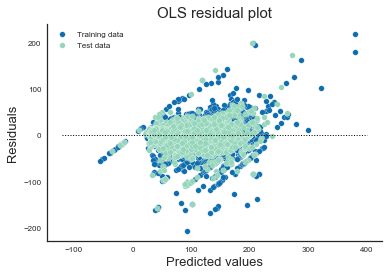

In [190]:
from sklearn.linear_model import LinearRegression
reg = pipe_lr.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

#residual plot
plt.scatter(x=y_train_pred, y = y_train_pred - y_train, c='#0d6dae', marker='o', edgecolor='white',label='Training data')
plt.scatter(x=y_test_pred, y = y_test_pred - y_test, c='#95d6bb', marker='o', edgecolor='white',
           label='Test data')
sns.set_style('white')
sns.despine(left=False, top=True, right=True, bottom=False)
sns.set_context('paper')
plt.xlabel('Predicted values', fontsize=13)
plt.ylabel('Residuals', fontsize=13)
plt.hlines(y=0, xmin=-120, xmax=400, color='black', lw=1, linestyles='dotted')
plt.title('OLS residual plot', fontsize=15)
plt.legend(loc='upper left')
plt.savefig("res_plot2.png")

## Cross validation: Lasso, Ridge and ElasticNet

In [43]:
cv_lasso_rmse =  []
cv_lasso_mae = []
cv_ridge_rmse = []
cv_ridge_mae = []
cv_ela_rmse = []
cv_ela_mae = []
ela_net_combs = []

alphas = np.logspace(-2, 1, 15) #set hyperparameter space for OLS, Lasso, Ridge
lambdas = np.logspace(-2, 0, 15) #set extra hyperparameter space for ElaNet - ændr denne til at være mellem 0 og 1

for alpha_1 in alphas:
    
    pipe_lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha_1))
    scores_lasso_rmse = cross_val_score(pipe_lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores_lasso_mae = cross_val_score(pipe_lasso, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_lasso_rmse.append(list(map(lambda x: math.sqrt(-1*x), scores_lasso_rmse)))
    cv_lasso_mae.append(list(-1*scores_lasso_mae))
    
    pipe_ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha_1))
    scores_ridge_rmse = cross_val_score(pipe_ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores_ridge_mae = cross_val_score(pipe_ridge, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_ridge_rmse.append(list(map(lambda x: math.sqrt(-1*x), scores_ridge_rmse)))
    cv_ridge_mae.append(list(-1*scores_ridge_mae))
    
    for alpha_2 in lambdas:
        pipe_ela = make_pipeline(StandardScaler(), ElasticNet(alpha=alpha_1, l1_ratio=alpha_2))
        scores_ela_rmse = cross_val_score(pipe_ela, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        scores_ela_mae = cross_val_score(pipe_ela, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        cv_ela_rmse.append(list(map(lambda x: math.sqrt(-1*x), scores_ela_rmse)))
        cv_ela_mae.append(list(-1*scores_ela_mae))
        ela_net_combs.append((alpha_1, alpha_2))

In [44]:
#print optimal values of lambda for Lasso and Ridge
optimal_lasso_rmse = pd.DataFrame(cv_lasso_rmse, index=alphas).mean(axis=1).nsmallest(1)
print(optimal_lasso_rmse)
optimal_lasso_mae = pd.DataFrame(cv_lasso_mae, index=alphas).mean(axis=1).nsmallest(1)
print(optimal_lasso_mae)
optimal_ridge_rmse = pd.DataFrame(cv_ridge_rmse, index=alphas).mean(axis=1).nsmallest(1)
print(optimal_ridge_rmse)
optimal_ridge_mae = pd.DataFrame(cv_ridge_mae, index=alphas).mean(axis=1).nsmallest(1)
print(optimal_ridge_mae)

0.117877    21.673295
dtype: float64
0.19307    14.158199
dtype: float64
10.0    21.678236
dtype: float64
0.01    14.171082
dtype: float64


In [48]:
#print rmse and mae for Lasso and Ridge in train data
pipe_lasso_optimal_rmse = make_pipeline(StandardScaler(),
                           Lasso(alpha=optimal_lasso_rmse.index[0]))
pipe_lasso_optimal_mae = make_pipeline(StandardScaler(),
                           Lasso(alpha=optimal_lasso_mae.index[0]))
pipe_ridge_optimal_rmse = make_pipeline(StandardScaler(),
                           Ridge(alpha=optimal_ridge_rmse.index[0]))
pipe_ridge_optimal_mae = make_pipeline(StandardScaler(),
                           Ridge(alpha=optimal_ridge_mae.index[0]))

pipe_lasso_optimal_rmse.fit(X_train,y_train)
pipe_lasso_optimal_mae.fit(X_train,y_train)
pipe_ridge_optimal_rmse.fit(X_train,y_train)
pipe_ridge_optimal_mae.fit(X_train,y_train)

print('Lasso_rmse', math.sqrt(mse(pipe_lasso_optimal_rmse.predict(X_train),y_train)))
print('Lasso_mae', mae(pipe_lasso_optimal_mae.predict(X_train),y_train))

print('Ridge_rmse', math.sqrt(mse(pipe_ridge_optimal_rmse.predict(X_train),y_train)))
print('Ridge_mae', mae(pipe_ridge_optimal_mae.predict(X_train),y_train))

Lasso_rmse 21.60525080567279
Lasso_mae 14.12170129304372
Ridge_rmse 21.598845137946284
Ridge_mae 14.121586670256365


In [49]:
#convert ElasticNet scores into a DataFrame, find mean and std.
df = pd.DataFrame(cv_ela_rmse)
mean = df.mean(axis=1) 
std = df.std(axis=1)

df['mean'] = mean
df['std'] = std

he = [list(t) for t in zip(*ela_net_combs)]

alpha_1 = pd.DataFrame(he[0])
alpha_2 = pd.DataFrame(he[1])
df['alpha_1'] = alpha_1
df['alpha_2'] = alpha_2

df = df.sort_values('mean')
df = df.reset_index()

,index,0,1,2,3,4,mean,std,alpha_1,alpha_2
0,89,21.756892,21.425149,22.362547,22.188507,20.633378,21.673295,0.687478,0.117877,1.0
1,74,21.758601,21.423070,22.364959,22.188010,20.633597,21.673648,0.688148,0.071969,1.0
2,59,21.761523,21.421611,22.367321,22.188932,20.634579,21.674793,0.688768,0.043940,1.0
3,44,21.763638,21.421063,22.369131,22.189952,20.635742,21.675905,0.689091,0.026827,1.0
4,29,21.765075,21.420868,22.370483,22.190777,20.636624,21.676765,0.689316,0.016379,1.0


In [50]:
#print rmse and mae for ElasticNet in train data
pipe_elanet_optimal = make_pipeline(StandardScaler(), 
                                         ElasticNet(alpha=0.117877, l1_ratio=1.0))
pipe_elanet_optimal.fit(X_train,y_train)
                                    
print(math.sqrt(mse(pipe_elanet_optimal.predict(X_train),y_train)))
print(mae(pipe_elanet_optimal.predict(X_train),y_train))

21.605250820030694
14.119377460791958


In [225]:
#create two DataFrames for ElasticNet: one with optimal lambda, one with optimal L1-ratio
df_alpha1 = df.loc[round(df['alpha_2'], 6) == 1.0]
df_alpha2 = df.loc[round(df['alpha_1'], 6) == 0.117877]

KeyError: 'alpha_2'

### Errorbar plots for ElasticNet

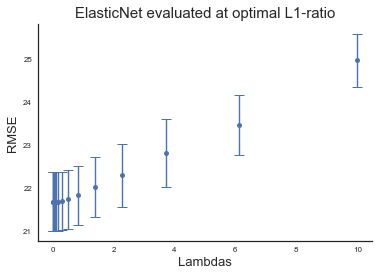

In [272]:
(_, caps, _) = plt.errorbar(df_alpha1['alpha_1'].values, df_alpha1['mean'].values, 
             yerr=df_alpha1['std'].values, fmt='o', linestyle='None', markersize=5, capsize=5)

for cap in caps:
    cap.set_markeredgewidth(1)
    
sns.set_style('white')
sns.despine(left=False, top=True, right=True, bottom=False)
sns.set_context('paper')
plt.xlabel('Lambdas', fontsize=13)
plt.ylabel('RMSE', fontsize=13)
plt.title('ElasticNet evaluated at optimal L1-ratio', fontsize=15)
plt.savefig('ElasticNet_lambdas')

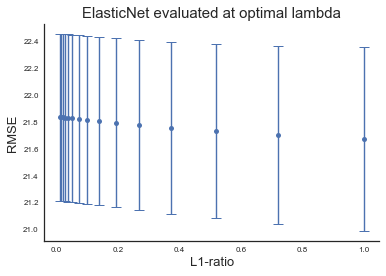

In [273]:
(_, caps, _) = plt.errorbar(df_alpha2['alpha_2'].values, df_alpha2['mean'].values, 
             yerr=df_alpha2['std'].values, fmt='o', linestyle='None', markersize=5, capsize=5)

for cap in caps:
    cap.set_markeredgewidth(1)


sns.set_style('white')
sns.despine(left=False, top=True, right=True, bottom=False)
sns.set_context('paper')
plt.xlabel('L1-ratio', fontsize=13)
plt.ylabel('RMSE', fontsize=13)
plt.title('ElasticNet evaluated at optimal lambda', fontsize=15)
plt.savefig('ElasticNet_alphas')

## Random Forest

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1)

cv_forest_mean_rmse = []
cv_forest_mean_mae = []
cv_forest_std_rmse = []
cv_forest_std_mae = []
forest_combs = []

for feature in np.arange(10,30,1): # loop over different number of features
    for estimator in range(10, 100, 10): #loop over different number of trees
        
        cv_forest_rmse_ = []
        cv_forest_mae_ = []
            
        for train_index, val_index in kf.split(X_train, y_train):
            
            X_train_, y_train_ = X_train[train_index], y_train[train_index]
            X_val, y_val = X_train[val_index], y_train[val_index]    

            reg_RF = RandomForestRegressor(max_features = feature, 
                                           n_estimators = estimator, 
                                           random_state=1).fit(X_train_,y_train_)
            
            cv_forest_rmse_.append(np.sqrt(mse(reg_RF.predict(X_val),y_val)))
            cv_forest_mae_.append(mae(reg_RF.predict(X_val),y_val))

    cv_forest_mean_mae.append(np.mean(cv_forest_mae_))
    cv_forest_mean_rmse.append(np.mean(cv_forest_rmse_))
    cv_forest_std_mae.append(np.std(cv_forest_mae_))
    cv_forest_std_rmse.append(np.std(cv_forest_rmse_))
            
    forest_combs.append((estimator, feature))

In [176]:
forest = pd.DataFrame(cv_forest_mean_rmse)
forest['mean'] = pd.DataFrame(cv_forest_mean_rmse)
forest['std'] = pd.DataFrame(cv_forest_std_rmse)

ze = [list(t) for t in zip(*forest_combs)]

forest['no_trees'] = pd.DataFrame(ze[0])
forest['no_features'] = pd.DataFrame(ze[1])

forest = forest.sort_values('mean')
forest = forest.reset_index()

,index,0,mean,std,no_trees,no_features
0,3,18.015934,18.015934,0.628105,90,13
1,4,18.052032,18.052032,0.656331,90,14
2,2,18.057390,18.057390,0.676332,90,12
3,5,18.060224,18.060224,0.615558,90,15
4,1,18.065572,18.065572,0.603604,90,11


In [194]:
#print mae and rmse for Random Forest in train and test data
forest_optimal = RandomForestRegressor(n_estimators=forest['no_trees'][0],
                                                        random_state=1,
                                                        n_jobs=-1, 
                                                         max_features=forest['no_features'][0])

forest_optimal.fit(X_train,y_train)
                                    
print(math.sqrt(mse(forest_optimal.predict(X_train),y_train)))
print(mae(forest_optimal.predict(X_train),y_train))

print(math.sqrt(mse(forest_optimal.predict(X_test),y_test)))
print(mae(forest_optimal.predict(X_test),y_test))

6.706880923738857
3.650724649045019
16.420370694001384
9.18595351823314


### Random Forest residual plot

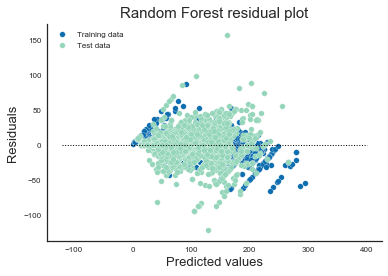

In [193]:
y_test_pred = forest_optimal.predict(X_test)
y_train_pred = forest_optimal.predict(X_train)

#residual plot
plt.scatter(x=y_train_pred, y = y_train_pred - y_train, c='#0d6dae', marker='o', edgecolor='white',label='Training data')
plt.scatter(x=y_test_pred, y = y_test_pred - y_test, c='#95d6bb', marker='o', edgecolor='white',
           label='Test data')
sns.set_style('white')
sns.despine(left=False, top=True, right=True, bottom=False)
sns.set_context('paper')
plt.xlabel('Predicted values', fontsize=13)
plt.ylabel('Residuals', fontsize=13)
plt.hlines(y=0, xmin=-120, xmax=400, color='black', lw=1, linestyles='dotted')
plt.title('Random Forest residual plot', fontsize=15)
plt.legend(loc='upper left')
plt.savefig("res_plot_RF.png")

## Regression coefficients

In [274]:
regr = LinearRegression()
regr.fit(X_train, y_train).predict(X_test)
dict(zip(sample.drop(['price_DKK'], axis=1).keys(), regr.coef_))

{'seats': 0.05264356092136373,
 'free_seats': -0.03760148887626872,
 'duration': 0.006348551915584197,
 'kids': -2.29039530568935,
 'music': 1.3287264021069156,
 'animals': -2.115182393943047,
 'comfort': -3.535409970511051,
 'smoking': 11.960294646857747,
 'weekday': 1.3258297743069272,
 'SJ_dep_int': -0.16428152980443017,
 'SJ_arr_int': -1.1912700796925728,
 'accept_cash_int': -45.6498161638146,
 'accept_online_payment_int': 45.649816163814585,
 'quick_booking_int': -0.8883389911724875,
 'flex_booking_int': -3.9348765008194646,
 'det_15_minutes': -0.6560901904171881,
 'det_5_minutes': -0.7546522605862958,
 'det_flexible': 1.3109112193250767,
 'det_none': 0.09983123167841863,
 'distance_KM': 0.1245656403829794,
 'taken_seats': 0.09024504979752758,
 'toll_road_bool': 20.56903360576154,
 'Night': -1.4208585679543686,
 'Morning': -3.400490855716649,
 'Forenoon': 1.9412044526637797,
 'Noon': -0.4987406503303697,
 'Afternoon': -0.7487153969465556,
 'Evening': 2.0116380737901207,
 'Late_eve

In [275]:
alpha = 0.1178
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train).predict(X_test)
dict(zip(sample.drop(['price_DKK'], axis=1).keys(), lasso.coef_))

{'seats': 0.0,
 'free_seats': -0.0,
 'duration': 0.006479238873235365,
 'kids': -1.573527875584098,
 'music': 0.42129414562554907,
 'animals': -0.4230728555113602,
 'comfort': -2.721705475825432,
 'smoking': 3.733779603702647,
 'weekday': 1.3832453980449815,
 'SJ_dep_int': 0.0,
 'SJ_arr_int': -0.3208369834308712,
 'accept_cash_int': -40.75132906577593,
 'accept_online_payment_int': 0.0,
 'quick_booking_int': -0.17008337740306084,
 'flex_booking_int': -3.5350600491371384,
 'det_15_minutes': -0.0,
 'det_5_minutes': -0.6308349877665398,
 'det_flexible': 0.49109385568851377,
 'det_none': 0.0,
 'distance_KM': 0.12631589184652664,
 'taken_seats': 0.06499044197509529,
 'toll_road_bool': 18.540670509102377,
 'Night': -0.0,
 'Morning': -2.4859109801270622,
 'Forenoon': 1.3494712243567297,
 'Noon': -0.0,
 'Afternoon': -0.0,
 'Evening': 0.9771203082444885,
 'Late_evening': 0.0}

In [276]:
alpha = 10.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train).predict(X_test)
dict(zip(sample.drop(['price_DKK'], axis=1).keys(), ridge.coef_))

{'seats': 0.07102960601810428,
 'free_seats': -0.03309955590902921,
 'duration': 0.006375165903084701,
 'kids': -2.2896512244032934,
 'music': 1.3212974723433986,
 'animals': -2.009748037365319,
 'comfort': -3.4397641545772477,
 'smoking': 11.136755114912177,
 'weekday': 1.329886242773206,
 'SJ_dep_int': -0.07511859960908944,
 'SJ_arr_int': -1.1527799573708764,
 'accept_cash_int': -38.18224179043291,
 'accept_online_payment_int': 38.18224179043505,
 'quick_booking_int': -0.7919932679816449,
 'flex_booking_int': -3.9195258041086056,
 'det_15_minutes': -0.6513918093354829,
 'det_5_minutes': -0.7512935148485016,
 'det_flexible': 1.2922206197894983,
 'det_none': 0.11046470436903308,
 'distance_KM': 0.12449566576092394,
 'taken_seats': 0.1041291621401237,
 'toll_road_bool': 20.251129134988332,
 'Night': -1.3958594698534688,
 'Morning': -3.358372299816634,
 'Forenoon': 1.9490284014448978,
 'Noon': -0.4893819286342091,
 'Afternoon': -0.7270313927788985,
 'Evening': 1.9716701996575219,
 'Late_

In [277]:
alpha = 0.1178
elasticnet = ElasticNet(alpha=alpha, l1_ratio=1.0)
elasticnet.fit(X_train, y_train).predict(X_test)
dict(zip(sample.drop(['price_DKK'], axis=1).keys(), elasticnet.coef_))

{'seats': 0.0,
 'free_seats': -0.0,
 'duration': 0.006479238873235365,
 'kids': -1.573527875584098,
 'music': 0.42129414562554907,
 'animals': -0.4230728555113602,
 'comfort': -2.721705475825432,
 'smoking': 3.733779603702647,
 'weekday': 1.3832453980449815,
 'SJ_dep_int': 0.0,
 'SJ_arr_int': -0.3208369834308712,
 'accept_cash_int': -40.75132906577593,
 'accept_online_payment_int': 0.0,
 'quick_booking_int': -0.17008337740306084,
 'flex_booking_int': -3.5350600491371384,
 'det_15_minutes': -0.0,
 'det_5_minutes': -0.6308349877665398,
 'det_flexible': 0.49109385568851377,
 'det_none': 0.0,
 'distance_KM': 0.12631589184652664,
 'taken_seats': 0.06499044197509529,
 'toll_road_bool': 18.540670509102377,
 'Night': -0.0,
 'Morning': -2.4859109801270622,
 'Forenoon': 1.3494712243567297,
 'Noon': -0.0,
 'Afternoon': -0.0,
 'Evening': 0.9771203082444885,
 'Late_evening': 0.0}

In [278]:
randomforest = RandomForestRegressor(n_estimators = 90, random_state = 1, n_jobs = -1, max_features = 13)
randomforest.fit(X_train, y_train).predict(X_test)
dict(zip(sample.drop(['price_DKK'], axis=1).keys(), randomforest.feature_importances_))

{'seats': 0.011591490556411364,
 'free_seats': 0.020151795231000382,
 'duration': 0.39653269295376675,
 'kids': 0.005387886824731187,
 'music': 0.004136646123121738,
 'animals': 0.003461753730848901,
 'comfort': 0.004209005003262588,
 'smoking': 0.0038007175459766483,
 'weekday': 0.014666213817433686,
 'SJ_dep_int': 0.007427770719546291,
 'SJ_arr_int': 0.006548777289792994,
 'accept_cash_int': 0.004449924316325367,
 'accept_online_payment_int': 0.0039486235095724,
 'quick_booking_int': 0.004332248652573037,
 'flex_booking_int': 0.003901760890854323,
 'det_15_minutes': 0.002760101753914362,
 'det_5_minutes': 0.0034834651850928445,
 'det_flexible': 0.004086755460578083,
 'det_none': 0.003267448966213896,
 'distance_KM': 0.38441351391593753,
 'taken_seats': 0.007318068185868831,
 'toll_road_bool': 0.082049262226182,
 'Night': 0.002141767479391827,
 'Morning': 0.0029653992647363995,
 'Forenoon': 0.003181222321199019,
 'Noon': 0.002632489751056364,
 'Afternoon': 0.0027087209112830533,
 'Eve

## Feature importances

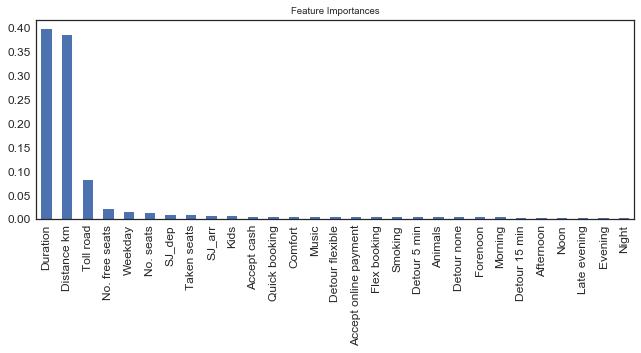

In [279]:
RF = {'No. seats': 0.011591490556411364,
 'No. free seats': 0.020151795231000382,
 'Duration': 0.39653269295376675,
 'Kids': 0.005387886824731187,
 'Music': 0.004136646123121738,
 'Animals': 0.003461753730848901,
 'Comfort': 0.004209005003262588,
 'Smoking': 0.0038007175459766483,
 'Weekday': 0.014666213817433686,
 'SJ_dep': 0.007427770719546291,
 'SJ_arr': 0.006548777289792994,
 'Accept cash': 0.004449924316325367,
 'Accept online payment': 0.0039486235095724,
 'Quick booking': 0.004332248652573037,
 'Flex booking': 0.003901760890854323,
 'Detour 15 min': 0.002760101753914362,
 'Detour 5 min': 0.0034834651850928445,
 'Detour flexible': 0.004086755460578083,
 'Detour none': 0.003267448966213896,
 'Distance km': 0.38441351391593753,
 'Taken seats': 0.007318068185868831,
 'Toll road': 0.082049262226182,
 'Night': 0.002141767479391827,
 'Morning': 0.0029653992647363995,
 'Forenoon': 0.003181222321199019,
 'Noon': 0.002632489751056364,
 'Afternoon': 0.0027087209112830533,
 'Evening': 0.0021918633603620766,
 'Late evening': 0.0022526140529661137}

s = pd.DataFrame(RF, index=[0]).T
s = s.sort_values(0, ascending=False)

ax = s.plot(kind='bar', title ="Feature Importances",figsize=(9,5),legend=False, fontsize=12)
#ax.set_xlabel("Features", fontsize=12)
#ax.set_ylabel("Importance", fontsize=12)
plt.tight_layout()
plt.savefig("feature_importances.png")